<a href="https://colab.research.google.com/github/punamvekariya68/COMP6721_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Base directory containing the folders
base_dir = '/content/drive/MyDrive/COMP6721/Project_Phase_1/Comp6721_Project_Dataset/Training'  # contains 'library/', 'shopping_mall/', 'museum/'
categories = ['library','museum', 'shopping_mall']
img_size = (128, 128)  # like CIFAR-10

# Storage for data and labels
X = []
y = []

In [ ]:
from tqdm import tqdm

# Loop through each category and image
for label_idx, category in enumerate(categories):
    folder_path = os.path.join(base_dir, category)
    # Wrap the inner loop with tqdm
    for file_name in tqdm(os.listdir(folder_path), desc=f"Loading images from {category}"):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(img_size, Image.LANCZOS)
                # plt.imshow(img)
                # plt.axis('off') # Hide the axes
                # plt.show()
                X.append(np.array(img))
                y.append(label_idx)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

Loading images from shopping_mall: 100%|██████████| 5000/5000 [01:16<00:00, 65.66it/s] 


In [ ]:
# Convert to NumPy arrays
X = np.array(X)  # shape: (num_samples, 32, 32, 3)
y = np.array(y)  # shape: (num_samples,)

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

print(f"Dataset created and shuffled: {X.shape} images, {y.shape} labels")

Dataset created and shuffled: (15000, 128, 128, 3) images, (15000,) labels


In [ ]:
# Label map
label_map = {0: 'library', 1: 'museum', 2: 'shopping_mall'}

# Display function
def display_grid_images_labels(images, labels, num_subplots=(3, 3),
                               figsize=(6, 6), path_file=None):
    fig, axes = plt.subplots(num_subplots[0], num_subplots[1], figsize=figsize)
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(label_map[label])
        ax.axis('off')
    plt.tight_layout()
    if path_file:
        fig.savefig(path_file)
    else:
        plt.show()


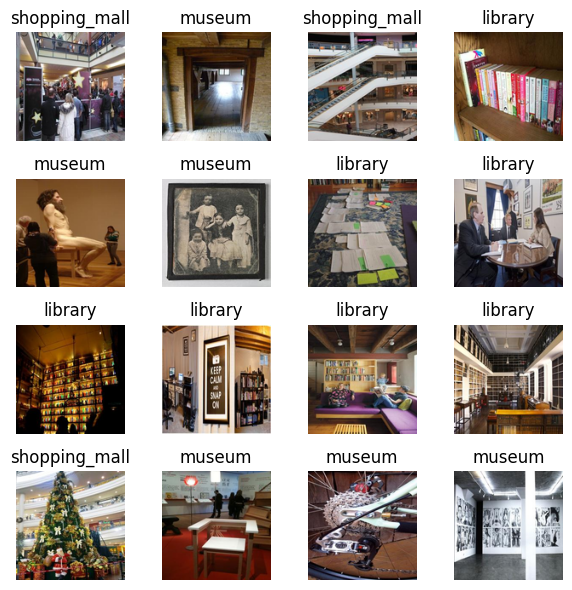

In [ ]:

# Select images and labels for visualization
num_selected = 16
images_selected = [X[i] for i in range(num_selected)]
labels_selected = [y[i] for i in range(num_selected)]

# Optional: save path
result_dir = "results"
result_name = "custom_dataset"
os.makedirs(result_dir, exist_ok=True)
file_save = os.path.join(result_dir, f'{result_name}_img.png')

# Display or save
display_grid_images_labels(images_selected, labels_selected,
                           path_file=file_save, figsize=(6, 6), num_subplots=(4, 4))

In [ ]:
print("team jarvis")